<a href="https://colab.research.google.com/github/rjnakano/manejo-inventarios-pdg/blob/main/Notebooks/TDG042321V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --upgrade kmodes

Requirement already up-to-date: kmodes in /usr/local/lib/python3.7/dist-packages (0.11.0)


In [2]:
from google.colab import drive
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

from kmodes.kprototypes import KPrototypes

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()

from plotnine import *
import plotnine

In [3]:
plot_kwds = {'alpha' : 0.5, 's' : 1, 'linewidths':0}

In [4]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
# Dataset de inventarios sin dimensiones de los productos
df = pd.read_csv("/content/gdrive/MyDrive/TDGdata/dfNoDims.csv")

In [6]:
data1 = df

In [7]:
data1.dtypes

AISLE          int64
IG            object
HTS           object
PLANNING      object
ABC           object
UOM           object
CAT           object
COSTX        float64
QTYVAR       float64
CONTRPERC    float64
dtype: object

In [8]:
data1['AISLE']=data1['AISLE'].astype(str)

In [9]:
data1.dtypes

AISLE         object
IG            object
HTS           object
PLANNING      object
ABC           object
UOM           object
CAT           object
COSTX        float64
QTYVAR       float64
CONTRPERC    float64
dtype: object

In [10]:
data1

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR,CONTRPERC
0,17,IG56,HTS119,1/1,B,PC,CAT17,-289.8802,-2.63,0.01
1,17,IG56,HTS119,1/1,B,PC,CAT17,289.5527,25.00,0.00
2,17,IG56,HTS119,1/1,C,PC,CAT17,1111.3121,50.00,0.00
3,17,IG56,HTS119,1/1,B,PC,CAT17,-266.8633,-9.09,0.00
4,15,IG56,HTS119,1/1,C,PC,CAT17,-517.0436,-11.11,0.00
...,...,...,...,...,...,...,...,...,...,...
16239,23,IG5,HTS67,1/0,C,BX,CAT2,316.3834,1.00,0.00
16240,21,IG5,HTS67,1/0,C,BX,CAT2,626.9100,1.00,0.00
16241,22,IG5,HTS67,1/0,C,BX,CAT2,4959.6974,136.36,0.00
16242,24,IG5,HTS67,1/0,C,BX,CAT2,-1322.5860,-100.00,0.00


In [11]:
numdf = data1[list(data1.select_dtypes('float64').columns)]
scaled_features = StandardScaler().fit_transform(numdf.values)
scaled_features_df = pd.DataFrame(scaled_features, index=numdf.index, columns=numdf.columns)
scaled_features_df

,COSTX,QTYVAR,CONTRPERC
0,-0.029671,-0.037167,-0.185651
1,0.092655,-0.006905,-0.210139
2,0.266138,0.020477,-0.210139
3,-0.024812,-0.044242,-0.210139
4,-0.077628,-0.046455,-0.210139
...,...,...,...
16239,0.098319,-0.033191,-0.210139
16240,0.163875,-0.033191,-0.210139
16241,1.078580,0.115063,-0.210139
16242,-0.247688,-0.143812,-0.210139


In [12]:
catdf = data1[list(data1.select_dtypes('object').columns)]

In [13]:
data1 = pd.concat((catdf, scaled_features_df), axis = 1)
data1

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR,CONTRPERC
0,17,IG56,HTS119,1/1,B,PC,CAT17,-0.029671,-0.037167,-0.185651
1,17,IG56,HTS119,1/1,B,PC,CAT17,0.092655,-0.006905,-0.210139
2,17,IG56,HTS119,1/1,C,PC,CAT17,0.266138,0.020477,-0.210139
3,17,IG56,HTS119,1/1,B,PC,CAT17,-0.024812,-0.044242,-0.210139
4,15,IG56,HTS119,1/1,C,PC,CAT17,-0.077628,-0.046455,-0.210139
...,...,...,...,...,...,...,...,...,...,...
16239,23,IG5,HTS67,1/0,C,BX,CAT2,0.098319,-0.033191,-0.210139
16240,21,IG5,HTS67,1/0,C,BX,CAT2,0.163875,-0.033191,-0.210139
16241,22,IG5,HTS67,1/0,C,BX,CAT2,1.078580,0.115063,-0.210139
16242,24,IG5,HTS67,1/0,C,BX,CAT2,-0.247688,-0.143812,-0.210139


In [14]:
catColumnsPos = [data1.columns.get_loc(col) for col in list(data1.select_dtypes('object').columns)]

In [15]:
# Fit the cluster 
# k = 2
# gamma = 0.5
import time
start_time = time.time()
kprototype = KPrototypes(n_jobs = -1, n_clusters = 2, init = 'Huang', gamma = 0.5, random_state = 0)
kprototype.fit_predict(data1, categorical = catColumnsPos)
print("--- %s seconds ---" % (time.time() - start_time))

--- 113.66927123069763 seconds ---


In [16]:
print(kprototype.cluster_centroids_)

[['0.002368341296926517' '-0.00025311015686731365' '-0.08310161254070987'
  '2' 'IG45' 'HTS119' '1/1' 'A' 'BX' 'CAT17']
 ['-0.26666198057232515' '0.028498787661964158' '9.356776667957375' '32'
  'IG61' 'HTS6' '1/1' 'A' 'BX' 'CAT14']]


In [17]:
data1['Cluster'] = kprototype.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


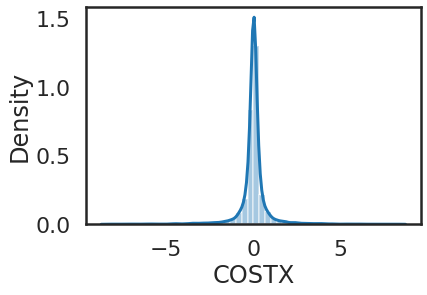

In [18]:
sns.distplot(data1.loc[data1['Cluster']==0,'COSTX']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


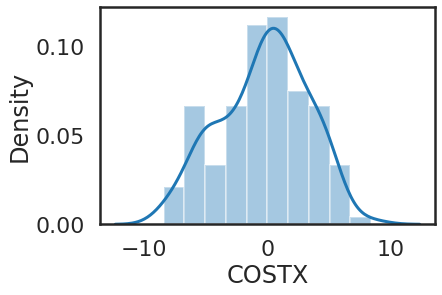

In [19]:
sns.distplot(data1.loc[data1['Cluster']==1,'COSTX']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


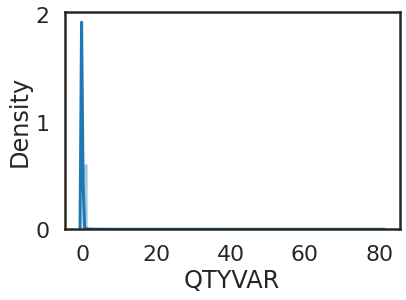

In [20]:
sns.distplot(data1.loc[data1['Cluster']==0,'QTYVAR']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


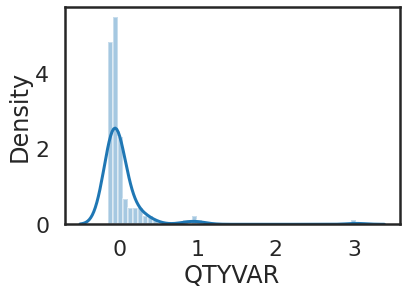

In [21]:
sns.distplot(data1.loc[data1['Cluster']==1,'QTYVAR']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


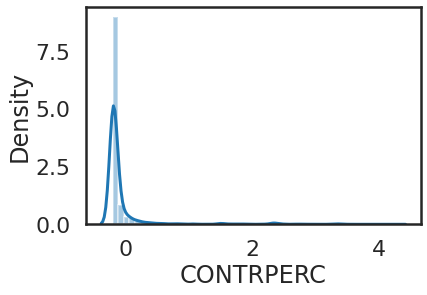

In [22]:
sns.distplot(data1.loc[data1['Cluster']==0,'CONTRPERC']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


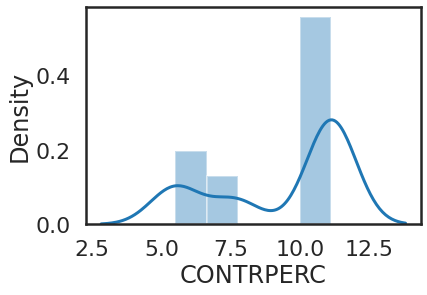

In [23]:
sns.distplot(data1.loc[data1['Cluster']==1,'CONTRPERC']);

In [24]:
contingency = pd.crosstab(data1['Cluster'], data1['CAT']) 
contingency

CAT,CAT1,CAT10,CAT11,CAT12,CAT14,CAT15,CAT16,CAT17,CAT2,CAT3,CAT4,CAT5,CAT6,CAT7,CAT8,CAT9
Cluster,,,,,,,,,,,,,,,,
0,146,251,1,2558,1996,83,2455,3988,190,519,104,200,7,1222,2221,160
1,0,0,0,0,143,0,0,0,0,0,0,0,0,0,0,0


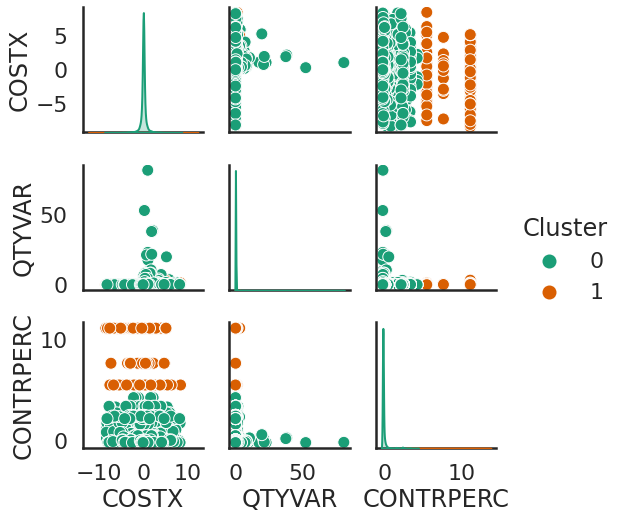

In [25]:
sns.pairplot(data1,hue='Cluster',palette='Dark2',diag_kind='kde')

In [26]:
data1[data1['Cluster']==0].describe()

,COSTX,QTYVAR,CONTRPERC,Cluster
count,16101.000000,16101.000000,16101.000000,16101.0
mean,0.002368,-0.000253,-0.083102,0.0
std,0.947685,1.004003,0.416489,0.0
min,-8.308003,-0.143812,-0.210139,0.0
25%,-0.120570,-0.089049,-0.210139,0.0
50%,0.024549,-0.035579,-0.185651,0.0
75%,0.157853,-0.029303,-0.161163,0.0
max,8.307268,80.959836,4.246670,0.0


In [27]:
data1[data1['Cluster']==1].describe()

,COSTX,QTYVAR,CONTRPERC,Cluster
count,143.000000,143.000000,143.000000,143.0
mean,-0.266662,0.028499,9.356777,1.0
std,3.534762,0.322169,2.403798,0.0
min,-8.415911,-0.143812,5.495556,1.0
25%,-2.701571,-0.090424,7.650497,1.0
50%,-0.130681,-0.037725,11.127787,1.0
75%,2.143386,0.007443,11.127787,1.0
max,8.414728,3.032428,11.127787,1.0


In [29]:
df['Cluster'] = kprototype.labels_

In [30]:
df[df['Cluster']==1]

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR,CONTRPERC,Cluster
1181,32,IG61,HTS6,1/1,A,BX,CAT14,-13387.9958,-100.00,4.63,1
1182,32,IG61,HTS6,1/1,A,BX,CAT14,21724.2322,886.39,4.63,1
1183,32,IG61,HTS6,1/1,A,BX,CAT14,-5051.7593,-17.28,4.63,1
1184,32,IG61,HTS6,1/1,A,BX,CAT14,-40013.9350,-62.34,4.63,1
1185,32,IG61,HTS6,1/1,A,BX,CAT14,-28293.1866,-53.92,4.63,1
...,...,...,...,...,...,...,...,...,...,...,...
12331,31,IG61,HTS6,1/1,A,BX,CAT14,-768.3450,-3.45,3.21,1
12332,31,IG61,HTS6,1/1,A,BX,CAT14,2305.0350,15.00,3.21,1
12333,31,IG61,HTS6,1/1,A,BX,CAT14,-34575.5256,-100.00,3.21,1
12334,31,IG61,HTS6,1/1,A,BX,CAT14,22282.0054,1.00,3.21,1


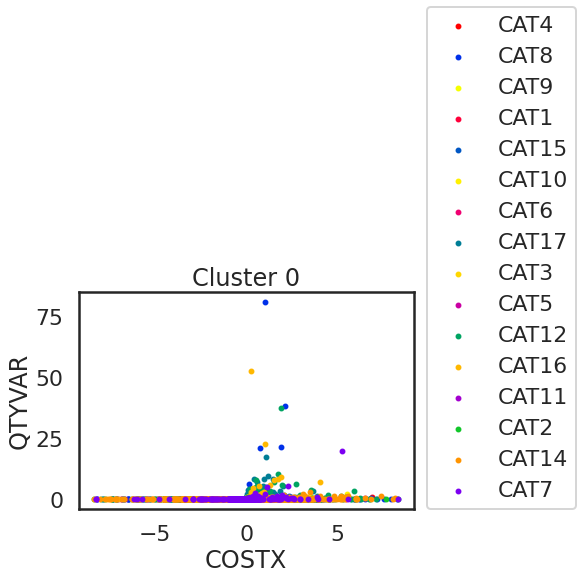

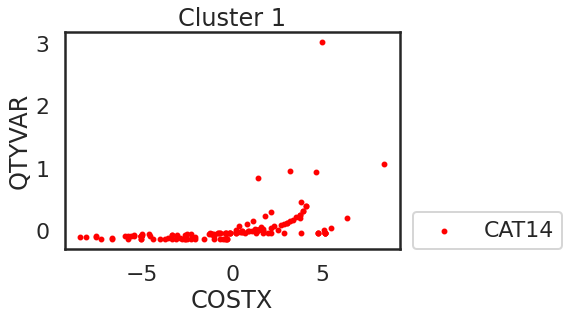

In [31]:
for cluster in np.unique(kprototype.labels_):
  plttitle = 'Cluster ' + cluster.astype(str)
  uniq = list(set(data1[data1['Cluster']==cluster].CAT))
  # Color map
  z = range(1,len(uniq))
  colorMap = plt.get_cmap('prism')
  cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
  scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=colorMap)
  # Plot CAT
  for i in range(len(uniq)):
    plt.scatter(data1[(data1['Cluster']==cluster) & ( data1['CAT']== uniq[i])].COSTX, data1[(data1['Cluster']==cluster) & ( data1['CAT']== uniq[i])].QTYVAR, s=15, color=scalarMap.to_rgba(i), label=uniq[i])
  plt.xlabel('COSTX')
  plt.ylabel('QTYVAR')
  plt.title(plttitle)
  plt.legend(loc=(1.04,0))
  plt.show()

In [32]:
list(set(data1[data1['Cluster']==0].CAT))

['CAT4',
 'CAT8',
 'CAT9',
 'CAT1',
 'CAT15',
 'CAT10',
 'CAT6',
 'CAT17',
 'CAT3',
 'CAT5',
 'CAT12',
 'CAT16',
 'CAT11',
 'CAT2',
 'CAT14',
 'CAT7']

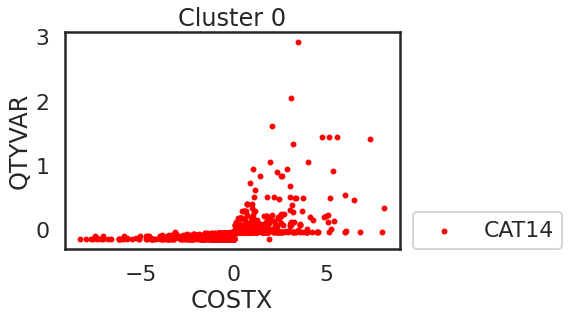

In [34]:
cluster=0
category='CAT14'
plttitle = 'Cluster ' + str(cluster)
uniq = list(set(data1[(data1['Cluster']==cluster) & (data1['CAT']==category)].CAT))
# Color map
z = range(1,len(uniq))
colorMap = plt.get_cmap('prism')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=colorMap)
# Plot CAT
for i in range(len(uniq)):
  plt.scatter(data1[(data1['Cluster']==cluster) & ( data1['CAT']== uniq[i])].COSTX, data1[(data1['Cluster']==cluster) & ( data1['CAT']== uniq[i])].QTYVAR, s=15, color=scalarMap.to_rgba(i), label=uniq[i])
plt.xlabel('COSTX')
plt.ylabel('QTYVAR')
plt.title(plttitle)
plt.legend(loc=(1.04,0))
plt.show()

In [40]:
contingency = pd.crosstab(data1[data1['Cluster']==1].Cluster, data1[data1['Cluster']==1].ABC) 
contingency

ABC,A
Cluster,
1,143


In [66]:
contingency = pd.crosstab(data1[(data1['Cluster']==0) & (data1['CAT']=='CAT14')].Cluster, data1[(data1['Cluster']==0) & (data1['CAT']=='CAT14')].ABC) 
contingency

ABC,A,B,C
Cluster,,,
0,1357,223,416


In [64]:
pd.set_option('display.max_rows', None)
print(df[df['Cluster']==1].sort_values(by=['CONTRPERC'], ascending=False))
pd.options.display.max_rows = 20

      AISLE    IG    HTS PLANNING  ...       COSTX   QTYVAR CONTRPERC  Cluster
1181     32  IG61   HTS6      1/1  ... -13387.9958  -100.00      4.63        1
2319     32  IG61   HTS6      1/1  ...  18339.7202   314.29      4.63        1
7794     32  IG61   HTS6      1/1  ... -27509.5803   -53.23      4.63        1
7793     32  IG61   HTS6      1/1  ... -21674.2148   -47.27      4.63        1
7792     32  IG61   HTS6      1/1  ...   2500.8709    20.00      4.63        1
7791     32  IG61   HTS6      1/1  ... -24175.0857   -54.72      4.63        1
7790     32  IG61   HTS6      1/1  ...  17506.0966   210.00      4.63        1
1182     32  IG61   HTS6      1/1  ...  21724.2322   886.39      4.63        1
6778     32  IG61   HTS6      1/1  ...   6668.9892   800.00      4.63        1
6777     32  IG61   HTS6      1/1  ...  -3334.4946   -12.12      4.63        1
6776     32  IG61   HTS6      1/1  ...  -5001.7419   -50.00      4.63        1
5670     32  IG61   HTS6      1/1  ...   7502.6128  

In [65]:
df[df['Cluster']==1].CONTRPERC.unique()

array([4.63, 2.33, 3.21])

In [76]:
contingency = pd.crosstab(df[(df['Cluster']==0) & (df['CAT']=='CAT14') & (df['ABC']=='A')].Cluster, df[(df['Cluster']==0) & (df['CAT']=='CAT14') & (df['ABC']=='A')].CONTRPERC) 
contingency

CONTRPERC,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.18,0.19,0.22,0.24,0.25,0.28,0.29,0.33,0.37,0.38,0.42,0.52,0.70,0.81,0.86,1.04,1.10,1.20,1.28,1.44,1.47,1.82
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,118,123,62,67,45,51,34,19,38,15,19,30,5,46,34,86,37,21,12,11,14,18,2,9,16,12,42,33,89,19,23,106,16,19,9,24,28,5


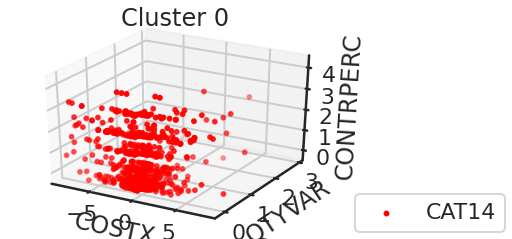

In [85]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
cluster=0
category='CAT14'
ABCcode='A'
plttitle = 'Cluster ' + str(cluster)
uniq = list(set(data1[(data1['Cluster']==cluster) & (data1['CAT']==category)].CAT))
# Color map
z = range(1,len(uniq))
colorMap = plt.get_cmap('prism')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=colorMap)
# Plot CAT
for i in range(len(uniq)):
  ax.scatter(xs = data1[(data1['Cluster']==cluster) & ( data1['CAT']== uniq[i]) & (data1['ABC']==ABCcode)].COSTX, ys = data1[(data1['Cluster']==cluster) & ( data1['CAT']== uniq[i]) & (data1['ABC']==ABCcode)].QTYVAR, zs = data1[(data1['Cluster']==cluster) & ( data1['CAT']== uniq[i]) & (data1['ABC']==ABCcode)].CONTRPERC, s=15, color=scalarMap.to_rgba(i), label=uniq[i])

ax.set_xlabel('COSTX')
ax.set_ylabel('QTYVAR')
ax.set_zlabel('CONTRPERC')

plt.title(plttitle)
plt.legend(loc=(1.04,0))
plt.show()

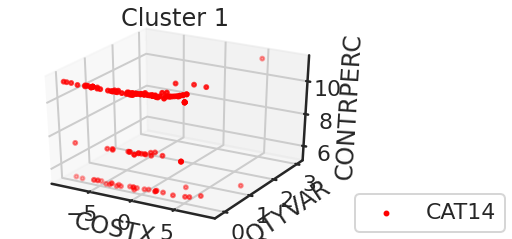

In [88]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
cluster=1
category='CAT14'
ABCcode='A'
plttitle = 'Cluster ' + str(cluster)
uniq = list(set(data1[(data1['Cluster']==cluster) & (data1['CAT']==category)].CAT))
# Color map
z = range(1,len(uniq))
colorMap = plt.get_cmap('prism')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=colorMap)
# Plot CAT
for i in range(len(uniq)):
  ax.scatter(xs = data1[(data1['Cluster']==cluster) & ( data1['CAT']== uniq[i]) & (data1['ABC']==ABCcode)].COSTX, ys = data1[(data1['Cluster']==cluster) & ( data1['CAT']== uniq[i]) & (data1['ABC']==ABCcode)].QTYVAR, zs = data1[(data1['Cluster']==cluster) & ( data1['CAT']== uniq[i]) & (data1['ABC']==ABCcode)].CONTRPERC, s=15, color=scalarMap.to_rgba(i), label=uniq[i])

ax.set_xlabel('COSTX')
ax.set_ylabel('QTYVAR')
ax.set_zlabel('CONTRPERC')

plt.title(plttitle)
plt.legend(loc=(1.04,0))
plt.show()

In [89]:
data2 = df.drop(['Cluster','CONTRPERC'], axis=1)

In [91]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16244 entries, 0 to 16243
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AISLE     16244 non-null  object 
 1   IG        16244 non-null  object 
 2   HTS       16244 non-null  object 
 3   PLANNING  16244 non-null  object 
 4   ABC       16244 non-null  object 
 5   UOM       16244 non-null  object 
 6   CAT       16244 non-null  object 
 7   COSTX     16244 non-null  float64
 8   QTYVAR    16244 non-null  float64
dtypes: float64(2), object(7)
memory usage: 1.1+ MB


In [93]:
data2.sample(5)

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR
8630,2,IG38,HTS61,1/1,C,SQFT,CAT8,-663.6049,-24.40
6467,12,IG51,HTS119,1/1,C,PR,CAT16,193.8434,9.76
1142,13,IG53,HTS119,1/1,A,PC,CAT16,-342.4428,-100.00
7746,3,IG31,HTS55,1/1,A,YD,CAT12,1604.9737,11.65
13005,15,IG46,HTS121,1/1,B,PR,CAT17,187.0837,16.00


In [94]:
numdf = data2[list(data2.select_dtypes('float64').columns)]
scaled_features = StandardScaler().fit_transform(numdf.values)
scaled_features_df = pd.DataFrame(scaled_features, index=numdf.index, columns=numdf.columns)
scaled_features_df

,COSTX,QTYVAR
0,-0.029671,-0.037167
1,0.092655,-0.006905
2,0.266138,0.020477
3,-0.024812,-0.044242
...,...,...
16240,0.163875,-0.033191
16241,1.078580,0.115063
16242,-0.247688,-0.143812
16243,-0.022349,-0.089049


In [95]:
catdf = data2[list(data2.select_dtypes('object').columns)]

In [96]:
data2 = pd.concat((catdf, scaled_features_df), axis = 1)
data2

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR
0,17,IG56,HTS119,1/1,B,PC,CAT17,-0.029671,-0.037167
1,17,IG56,HTS119,1/1,B,PC,CAT17,0.092655,-0.006905
2,17,IG56,HTS119,1/1,C,PC,CAT17,0.266138,0.020477
3,17,IG56,HTS119,1/1,B,PC,CAT17,-0.024812,-0.044242
...,...,...,...,...,...,...,...,...,...
16240,21,IG5,HTS67,1/0,C,BX,CAT2,0.163875,-0.033191
16241,22,IG5,HTS67,1/0,C,BX,CAT2,1.078580,0.115063
16242,24,IG5,HTS67,1/0,C,BX,CAT2,-0.247688,-0.143812
16243,20,IG5,HTS67,1/0,C,BX,CAT2,-0.022349,-0.089049


In [97]:
catColumnsPos = [data2.columns.get_loc(col) for col in list(data1.select_dtypes('object').columns)]

**Voy a correr el codigo de la matriz de distancias para el "nuevo" dataset (sin CONTRPERC)**